In [9]:
import random

class GridWorld : # environmet
    def __init__(self) :
        self.x = 0
        self.y = 0
        
    def step(self, a):
        if a == 0 :
            self.move_right()
        elif a == 1 :
            self.move_left()
        elif a == 2 :
            self.move_up()
        elif a == 3 :
            self.move_down()
        reward = -1
        done = self.is_done()
        return (self.x, self.y), reward, done
    
    def move_right(self) :
        self.y += 1
        if self.y > 3 : self.y = 3
    
    def move_left(self) :
        self.y -= 1
        if self.y < 0 : self.y = 0
    
    def move_up(self) :
        self.x -= 1
        if self.x < 0 : self.x = 0
    
    def move_down(self) :
        self.x += 1
        if self.x > 3 : self.x = 3
    
    def is_done(self) :
        if self.x == 3 and self.y == 3 : return True
        else : return False
    
    def get_state(self) : return (self.x, self.y)
    
    def reset(self) :
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class Agent :
    def __init__(self) :
        pass
    
    def select_action(self) :
        coin = random.random()
        if coin < 0.25 : action = 0
        elif coin < 0.5 : action = 1
        elif coin < 0.75 : action = 2
        else : action = 3
        return action

def main() :
    env = GridWorld()
    agent = Agent()
    data = [
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0]
    ]
    gamma = 1
    alpha = 0.0001
    
    for k in range(50000) :
        done = False
        history = []
        while not done :
            action = agent.select_action()
            (x, y), reward, done = env.step(action)
            history.append((x, y, reward))
        env.reset()
        
        cum_reward = 0
        for transition in history[::-1] :
            x, y, reward = transition
            data[x][y] = data[x][y] + alpha * (cum_reward - data[x][y])
            cum_reward = reward + gamma * cum_reward
    
    for row in data : print(row)

In [10]:
if __name__ == '__main__' : main()

[-58.78542887534158, -56.1814500031028, -52.82614830138516, -52.144612878322036]
[-56.04417749285425, -53.67684332580297, -49.339898529956834, -45.03130685788562]
[-53.116310267612334, -49.48502932036026, -40.91614690590327, -30.148705147135924]
[-50.81118392680081, -45.60522658964856, -30.09931732114166, 0.0]


In [13]:
def main() :
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    
    env = GridWorld()
    agent = Agent()
    data = [
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0]
    ]
    gamma = 1
    alpha = 0.0001
    
    for k in range(50000) :
        done = False
        history = []
        while not done :
            action = agent.select_action()
            (x, y), reward, done = env.step(action)
            history.append((x, y, reward))
        env.reset()
        
        cum_reward = 0
        for transition in history[::-1] :
            x, y, reward = transition
            data[x][y] = data[x][y] + alpha * (cum_reward - data[x][y])
            cum_reward = reward + gamma * cum_reward
    
    for row in data : print(row)
    
    sns.heatmap(
        np.array(data),
        annot = True,
        cmap = 'viridis'
    )
    plt.show()

[-58.68158286455868, -56.81418505715728, -53.930523700981794, -51.44353454282449]
[-57.269122008524164, -54.34329048620266, -49.728468320339815, -44.35388833514733]
[-54.321161931237185, -49.390209474952954, -40.77681221920721, -29.775971341576632]
[-50.62443562829836, -45.01973898279289, -30.198305211360903, 0.0]


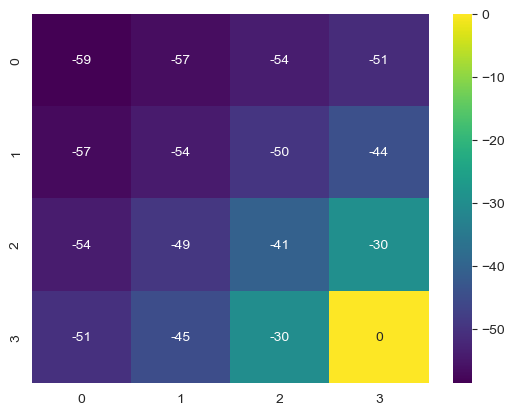

In [14]:
if __name__ == '__main__' : main()